In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import datasets

In [13]:
# some helper functions

def getkey(item):
    return item[0]

def distance(x1, x2):
    return ((x1-x2) ** 2).sum()

def accuracy(x_test, y_test, x_train, y_train, k):
    y_pred = []
    for i in range(len(x_test)):
        y_pred.append(KNN(x_test[i], x_train, y_train, k))
    return (np.array(y_pred) == y_test).sum() / len(y_test)

def r2_score(x_test, y_test, x_train, y_train, k):
    y_pred = []
    for i in range(len(x_test)):
        y_pred.append(KNN(x_test[i], x_train, y_train, k))
    tot = ((y_test - y_test.mean()) ** 2).sum()
    res = ((y_test - y_pred) ** 2).sum()
    score = 1 - (res / tot)
    return score

### Data collection

In [14]:
# Classification data
x, y = make_classification(n_samples=300, n_features=2, n_redundant=0)

# Regression data
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, boston.target)
x_train = np.array([df[column] for column in df.columns]).T
y_train = boston.target

### For a classification problem

In [15]:
def KNN(x, x_train, y_train, k):
    d = []
    for i in range(len(x_train)):
        d.append([distance(x, x_train[i]), y_train[i]])
    d = sorted(d, key = getkey)
    num_of_classes = len(np.unique(y_train))
    nearest_neighbours = [d[i][1] for i in range(k)]
    output = 0
    max_count = nearest_neighbours.count(0)
    for i in range(1, num_of_classes):
        c = nearest_neighbours.count(i)
        if c > max_count:
            max_count = c
            output = i
    return output

Accuracy on training data 0.973333333333


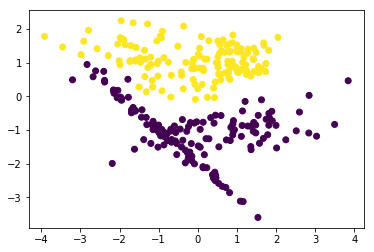

In [16]:
# Decision boundary generated
y_pred = []
for i in range(len(x)):
    y_pred.append(KNN(x[i], x, y, 10))
print("Accuracy on training data", accuracy(x, y, x, y, 10))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.show()

### Distance weighted KNN (classification)

In [17]:
def KNN(x, x_train, y_train, k):
    d = []
    for i in range(len(x_train)):
        d.append([distance(x, x_train[i]), y_train[i]])
    d = sorted(d, key = getkey)
    num_of_classes = len(np.unique(y_train))
    output = -1
    maximum = -1
    nearest_neighbours = [d[i][1] for i in range(k)]
    for i in range(num_of_classes):
        sum = 0
        for j in range(k):
            if d[j][1] == i:
                sum += 1 / (d[j][0]+1)
        if sum > maximum:
            maximum = sum
            output = i
    return output

Accuracy on training data 0.976666666667


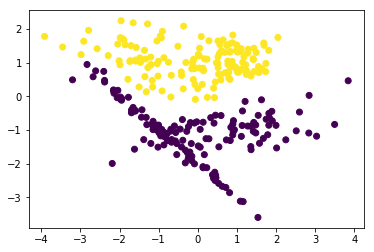

In [18]:
# Decision boundary generated
y_pred = []
for i in range(len(x)):
    y_pred.append(KNN(x[i], x, y, 10))
print("Accuracy on training data", accuracy(x, y, x, y, 5))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.show()

### For a regression problem

In [19]:
def KNN(x, x_train, y_train, k):
    d = [[distance(x, x_train[i]), y_train[i]] for i in range(len(x_train))]
    d = sorted(d, key = getkey)
    nearest_neighbours = [d[i][1] for i in range(k)]
    sum = 0
    for i in range(k):
        sum += nearest_neighbours[i]
    return sum / k

In [20]:
# r2_score on the training set
print(r2_score(x_train, y_train, x_train, y_train, 5))

0.716098217737


### Distance weighted KNN (regression)

In [21]:
def KNN(x, x_train, y_train, k):
    d = [[distance(x, x_train[i]), y_train[i]] for i in range(len(x_train))]
    d = sorted(d, key = getkey)
    nearest_neighbours = [d[i][1] for i in range(k)]
    num = 0
    den = np.sum([(1/(d[i][0]+1)) for i in range(k)])
    for i in range(k):
        num += (1/(d[i][0]+1)) * nearest_neighbours[i]
    return num / den

In [22]:
# r2_score on the training set
print(r2_score(x_train, y_train, x_train, y_train, 5))

0.998049875955


### Using KNN from sklearn

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Accuracy on the training set 0.973333333333


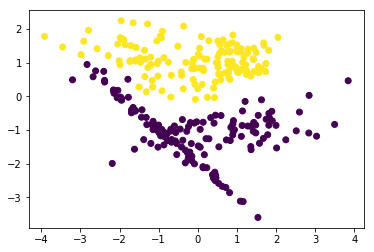

In [25]:
# Decision boundary generated
y_pred = clf.predict(x)
print("Accuracy on the training set", (y_pred == y).sum() / len(y))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.show()